## Ground State of Spin-1/2 Systems

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def createBasis(N):
    return np.array(range(2**N))

def getIndex(state):
    return np.where(states == state)

def bin(x):
    return f'{x:0{N}b}'

In [3]:
N = 3
states = createBasis(N)

list(zip(states,[bin(i) for i in states]));

In [4]:
def spin_z(state,index):
    return 1 if (state & (1<<index)) != 0 else -1

def spin_z_z1_open(state,N):
    spins = np.array([1 if (state & (1<<index)) != 0 else -1 for index in range(N)])[::-1]
    return sum(np.multiply(spins[:-1],spins[1:]))
    
    
dict(zip([bin(state) for state in states],[[spin_z(state,index) for index in range(N)] for state in states]));

In [5]:
def spin_x(state,index):
    return state ^ (1<<index)
dict(zip([bin(state) for state in states],[[bin(spin_x(state,index)) for index in range(N)] for state in states]));

In [6]:
def hamiltonian_openBoundry(J = 1,g = 0.5,N = 3):
    
    states = createBasis(N)
    
    H = sp.sparse.lil_matrix((2**N,2**N))

    for state in states:
        
        H[state,state] = -J*spin_z_z1_open(state,N)
        
        sx = [spin_x(state,s) for s in range(N)]
        for i in sx:
            H[state,i] = -g
    return H

In [7]:
def groundState(J = 1, g = 0,N = 5):
    H = hamiltonian(J,g,N)
    return sp.sparse.linalg.eigsh(H,k = 1,which='SA',return_eigenvectors=False)

In [8]:
#Hamiltonian
J,g,N = 1,0.5,3
H = hamiltonian_openBoundry(J,g,N)

#K = H.asformat("array")
#K, (K == K.T).all()

gs,gs_vec = sp.sparse.linalg.eigsh(H,k = 1,which='SA')

gs,gs_vec

(array([-2.40321193]),
 array([[-0.63822335],
        [-0.19855627],
        [-0.11756599],
        [-0.19855627],
        [-0.19855627],
        [-0.11756599],
        [-0.19855627],
        [-0.63822335]]))

PRINTING


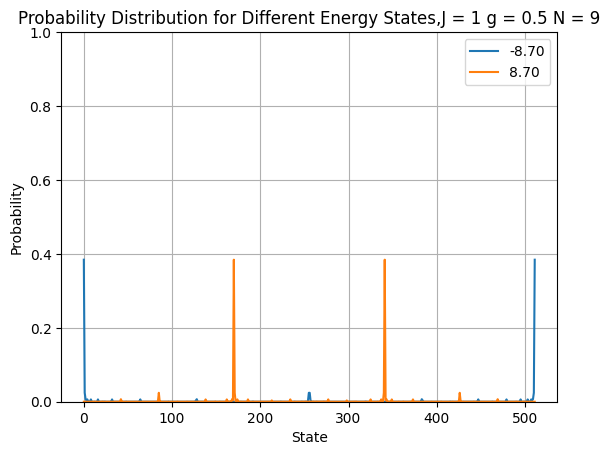

In [9]:
J,g,N = 1,0.5,9
H = hamiltonian_openBoundry(J,g,N)

gs,gs_vec = sp.sparse.linalg.eigsh(H,k = 2,which='BE')
gs_vec = gs_vec.T
print("PRINTING")

fig = plt.figure()

for e,vec in zip(gs,gs_vec):
    vec /= np.sqrt(np.sum(vec**2))
    plt.plot(list(range(len(vec))),vec**2,label = f'{e:.2f}')
    
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.ylabel("Probability")
plt.xlabel("State")
plt.title(f"Probability Distribution for Different Energy States,J = {J} g = {g} N = {N}")
plt.show()

PRINTING


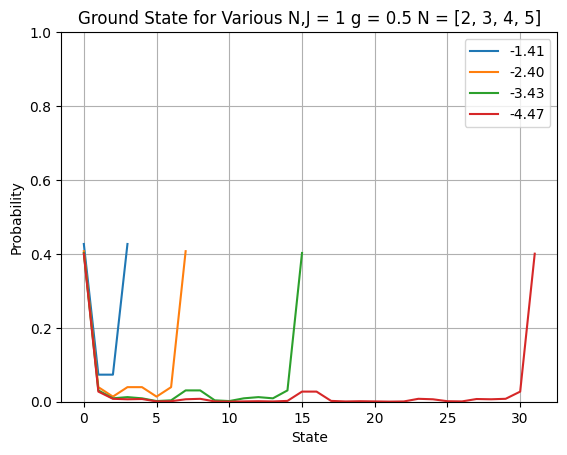

In [12]:
J,g = 1,0.5
N = list(range(2,6))

H = [hamiltonian_openBoundry(J,g,n) for n in N]

GS = [sp.sparse.linalg.eigsh(h,k = 1,which='SA') for h in H]


print("PRINTING")

fig = plt.figure()

for gs,gs_vec in GS:
    gs_vec = gs_vec.T
    for e,vec in zip(gs,gs_vec):
        vec /= np.sqrt(np.sum(vec**2))
        plt.plot(list(range(len(vec))),vec**2,label = f'{e:.2f}')
    
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.ylabel("Probability")
plt.xlabel("State")
plt.title(f"Ground State for Various N,J = {J} g = {g} N = {N}")
plt.show()

PRINTING


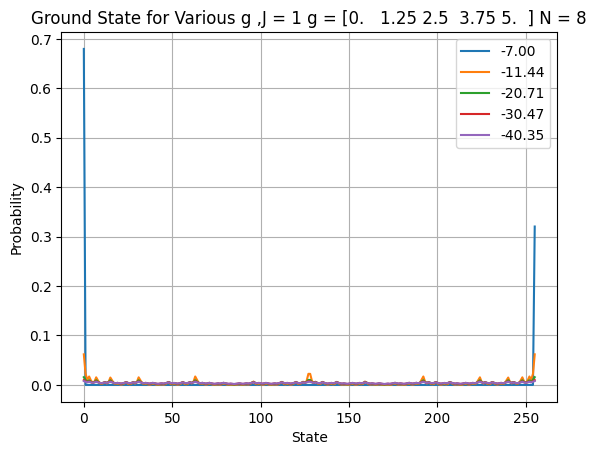

In [11]:
J,N = 1,8
G = np.linspace(0,5,5)

H = [hamiltonian_openBoundry(J,g,N) for g in G]

GS = [sp.sparse.linalg.eigsh(h,k = 1,which='SA') for h in H]


print("PRINTING")

fig = plt.figure()

for gs,gs_vec in GS:
    
    gs_vec = gs_vec.T
    
    for e,vec in zip(gs,gs_vec):
        
        #vec /= np.sqrt(np.sum(vec**2))

        plt.plot(list(range(len(vec))),vec**2,label = f'{e:.2f}')
    
plt.legend()
#plt.ylim(0,1)
plt.grid()
plt.ylabel("Probability")
plt.xlabel("State")
plt.title(f"Ground State for Various g ,J = {J} g = {G} N = {N}")
plt.show()